## Citrone performance Project

### Introduction
This project trains a machine learning model that will predict if a student will graduate / move from the beginner class to the intermediate class or not from the Stutern learning management platform (Citrone)

The columns in the dataset include:

 - S/N : Serial Number
 - Name : Names of Student
 - Email: Student's email address
 - Address: Student's Address during Application
 - Lesson Summary: Date column	
 - Quiz Summary
 - Assignment Summary	Grade Point Average	Intermediate class Eligibility

Due to the limited data point available for the initial training of the model, more data were generated random online from this website, the data were generated to reflect real world stutern student's data.
Downloaded dummy data from [https://www.mockaroo.com/] to add to the existing data, so as to make the machine learning model perform very well

### Import libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use(style="seaborn")
%matplotlib inline

In [2]:
# Read in the dataset
df = pd.read_excel("Copy of Citrone Performance overview_id.xlsx")

In [3]:
df.head()

,S/N,Name,Email Address,Lesson Summary,Quiz Summary,Assignment Summary,Grade Point Average,Intermediate class Eligibility
0,1,id_1,NaN,0/5,NaN,0,0.0,No
1,2,id_2,NaN,2023-05-05 00:00:00,NaN,70,56.0,Yes
2,3,id_3,NaN,2023-02-05 00:00:00,NaN,80,64.0,Yes
3,4,id_4,NaN,2023-05-05 00:00:00,NaN,100,80.0,Yes
4,5,id_5,NaN,2023-06-05 00:00:00,NaN,80,64.0,Yes


Downloaded dummy data from [https://www.mockaroo.com/] to add to the existing data, so as to make the machine learning model perform very well

In [4]:
# Downloaded dummy data from https://www.mockaroo.com/
df1 = pd.read_csv("MOCK_DATA_1.csv")

In [5]:
df1.head()

,Name,Email Address,Lesson Summary,Quiz Summary,Assignment Summary,Grade Point Average,Gender,Age,Children,Completed_Nysc,Intermediate class Eligibility
0,1,NaN,2023-01-24,77,61,17,Female,25,True,False,True
1,2,NaN,2023-04-08,89,2,77,Male,31,False,False,False
2,3,NaN,2023-01-12,80,61,59,Male,30,True,True,True
3,4,NaN,2023-02-24,73,71,57,Male,24,True,True,True
4,5,NaN,2023-03-08,92,82,13,Male,39,False,False,False


In [6]:
# Creating a copy of the data
df2 = df1.copy()

## Data Cleaning

In [7]:
def grade_point(column):
    """This fuction helps to categorize students that passed from student that failed"""
    if column > 50:
        return "Yes"
    else:
        return "No"

In [8]:
df2["intermediate_eligibility"] = df2["Grade Point Average"].apply(grade_point)

In [9]:
df2.head()

,Name,Email Address,Lesson Summary,Quiz Summary,Assignment Summary,Grade Point Average,Gender,Age,Children,Completed_Nysc,Intermediate class Eligibility,intermediate_eligibility
0,1,NaN,2023-01-24,77,61,17,Female,25,True,False,True,No
1,2,NaN,2023-04-08,89,2,77,Male,31,False,False,False,Yes
2,3,NaN,2023-01-12,80,61,59,Male,30,True,True,True,Yes
3,4,NaN,2023-02-24,73,71,57,Male,24,True,True,True,Yes
4,5,NaN,2023-03-08,92,82,13,Male,39,False,False,False,No


In [10]:
df2 = df2.drop(columns=["Intermediate class Eligibility"], axis=True)

In [11]:
# Concatenating both dataframes
data = pd.concat([df, df2], axis=False)

In [12]:
# replace column spaces with underscore
new_columns = []
for column in data.columns:
    if " " in column:
        fill = column.replace(" ", "_")
        new_columns.append(fill)
    else:
        new_columns.append(column)
        

In [13]:
data.columns = new_columns

In [14]:
data = data.drop(columns=["Intermediate_class_Eligibility"], axis=1)

In [15]:
# Checking the null  values in the dataframes, Notice that there are columns with no values at all
data.isna().sum()

S/N                         1000
Name                           0
Email_Address               1060
Lesson_Summary                 0
Quiz_Summary                  60
Assignment_Summary             0
Grade_Point_Average            0
Gender                        60
Age                           60
Children                      60
Completed_Nysc                60
intermediate_eligibility      60
dtype: int64

In [16]:
# Dropping the blank columns ( columns with no values will not add value to my machine learning model)
data = data.drop(columns=["Name","Email_Address"], axis=1)

In [17]:
data["intermediate_eligibility"] = data["Grade_Point_Average"].apply(grade_point)

In [18]:
data.tail()

,S/N,Lesson_Summary,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc,intermediate_eligibility
995,NaN,2023-02-20,76.0,1,6.0,Male,23.0,False,True,No
996,NaN,2023-02-04,60.0,99,54.0,Male,24.0,True,True,Yes
997,NaN,2023-04-10,93.0,37,17.0,Female,18.0,True,False,No
998,NaN,2023-01-19,64.0,19,16.0,Male,20.0,True,False,No
999,NaN,2023-04-12,86.0,84,42.0,Female,22.0,True,True,No


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   S/N                       60 non-null     float64
 1   Lesson_Summary            1060 non-null   object 
 2   Quiz_Summary              1000 non-null   float64
 3   Assignment_Summary        1060 non-null   int64  
 4   Grade_Point_Average       1060 non-null   float64
 5   Gender                    1000 non-null   object 
 6   Age                       1000 non-null   float64
 7   Children                  1000 non-null   object 
 8   Completed_Nysc            1000 non-null   object 
 9   intermediate_eligibility  1060 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 91.1+ KB


In [20]:
data.isna().sum()

S/N                         1000
Lesson_Summary                 0
Quiz_Summary                  60
Assignment_Summary             0
Grade_Point_Average            0
Gender                        60
Age                           60
Children                      60
Completed_Nysc                60
intermediate_eligibility       0
dtype: int64

## Dealing with missing data

In [21]:
# Imputing missing data using SimpleImputer
from sklearn.impute import SimpleImputer
#data["Assignment Summary","Grade Point Average"].fillna(np.median())

In [22]:
missing_col = data[["Quiz_Summary", "Age"]]

In [23]:
imp_median = SimpleImputer(strategy="median")
missing_col_1 = imp_median.fit_transform(missing_col)

In [24]:
changed= pd.DataFrame(missing_col_1, columns=["Quiz_Summary", "Age"])

In [25]:
missing_col = changed

In [26]:
data[["Quiz_Summary", "Age"]] = missing_col

In [27]:
# Checking for missing data again
data.isna().sum()

S/N                         1000
Lesson_Summary                 0
Quiz_Summary                   0
Assignment_Summary             0
Grade_Point_Average            0
Gender                        60
Age                            0
Children                      60
Completed_Nysc                60
intermediate_eligibility       0
dtype: int64

In [28]:
# Filling categorical data and boolean data with mode
data.Gender = data.Gender.fillna(data.Gender.mode()[0])

In [29]:
data.Children = data.Children.fillna(data.Children.mode()[0])

In [30]:
data.Completed_Nysc = data.Completed_Nysc.fillna(data.Completed_Nysc.mode()[0])

In [31]:
data.isna().sum()

S/N                         1000
Lesson_Summary                 0
Quiz_Summary                   0
Assignment_Summary             0
Grade_Point_Average            0
Gender                         0
Age                            0
Children                       0
Completed_Nysc                 0
intermediate_eligibility       0
dtype: int64

In [32]:
data.head()

,S/N,Lesson_Summary,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc,intermediate_eligibility
0,1.0,0/5,74.0,0,0.0,Male,29.0,True,True,No
1,2.0,2023-05-05 00:00:00,74.0,70,56.0,Male,29.0,True,True,Yes
2,3.0,2023-02-05 00:00:00,74.0,80,64.0,Male,29.0,True,True,Yes
3,4.0,2023-05-05 00:00:00,74.0,100,80.0,Male,29.0,True,True,Yes
4,5.0,2023-06-05 00:00:00,74.0,80,64.0,Male,29.0,True,True,Yes


In [33]:
## Mapping the target variable to numerial value

In [34]:
data["intermediate_eligibility"] = data["intermediate_eligibility"].map({"No":0, "Yes":1})

In [35]:
data.head()

,S/N,Lesson_Summary,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc,intermediate_eligibility
0,1.0,0/5,74.0,0,0.0,Male,29.0,True,True,0
1,2.0,2023-05-05 00:00:00,74.0,70,56.0,Male,29.0,True,True,1
2,3.0,2023-02-05 00:00:00,74.0,80,64.0,Male,29.0,True,True,1
3,4.0,2023-05-05 00:00:00,74.0,100,80.0,Male,29.0,True,True,1
4,5.0,2023-06-05 00:00:00,74.0,80,64.0,Male,29.0,True,True,1


### Exploratory Data Analysis

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   S/N                       60 non-null     float64
 1   Lesson_Summary            1060 non-null   object 
 2   Quiz_Summary              1060 non-null   float64
 3   Assignment_Summary        1060 non-null   int64  
 4   Grade_Point_Average       1060 non-null   float64
 5   Gender                    1060 non-null   object 
 6   Age                       1060 non-null   float64
 7   Children                  1060 non-null   bool   
 8   Completed_Nysc            1060 non-null   bool   
 9   intermediate_eligibility  1060 non-null   int64  
dtypes: bool(2), float64(4), int64(2), object(2)
memory usage: 76.6+ KB


In [37]:
data.describe()

,S/N,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Age,intermediate_eligibility
count,60.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000
mean,30.500000,73.380189,49.350000,50.116226,29.059434,0.501887
std,17.464249,15.228997,30.019873,29.761713,6.159453,0.500232
min,1.000000,45.000000,0.000000,0.000000,18.000000,0.000000
25%,15.750000,62.000000,22.000000,23.000000,24.000000,0.000000
50%,30.500000,74.000000,51.000000,51.000000,29.000000,1.000000
75%,45.250000,86.000000,75.000000,78.000000,34.000000,1.000000
max,60.000000,100.000000,100.000000,100.000000,40.000000,1.000000


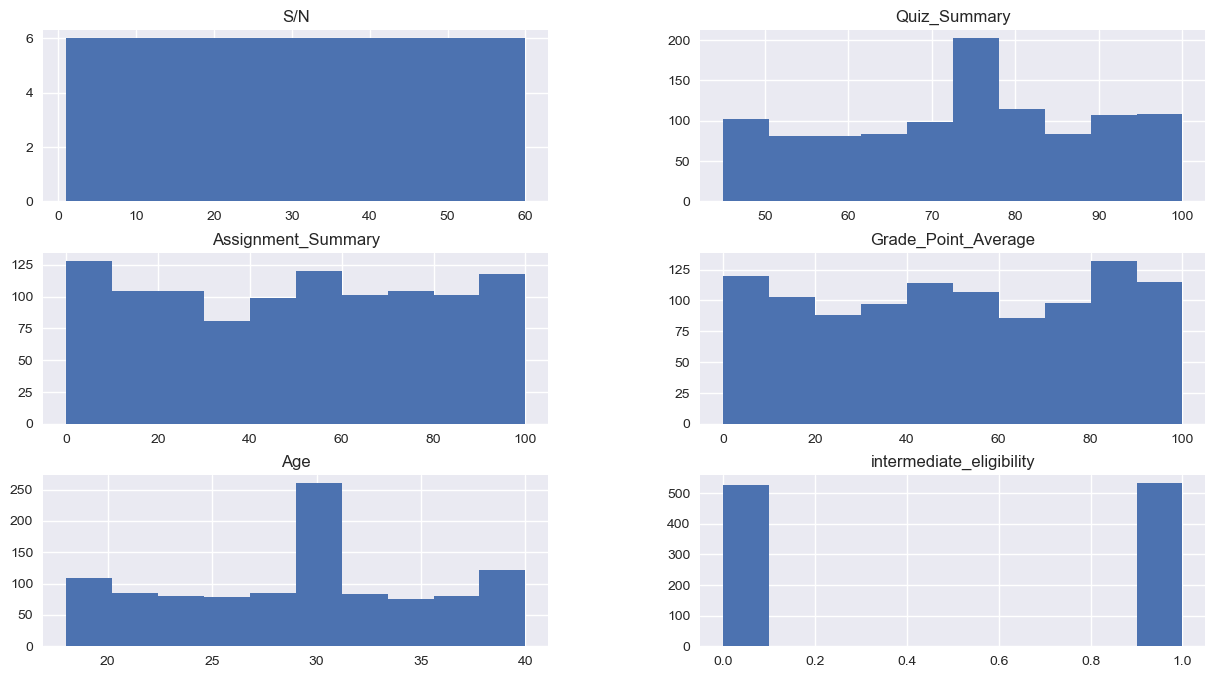

In [38]:
data.hist(figsize=(15, 8));

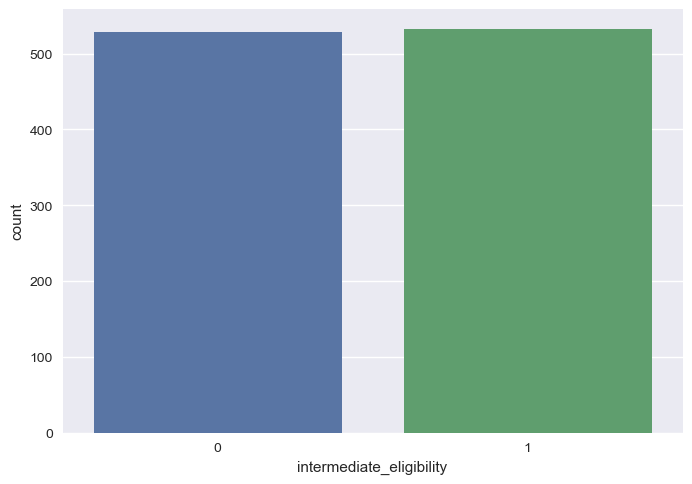

In [39]:
sns.countplot(data=data, x= "intermediate_eligibility");

In [40]:
# Checking the correlation between the target variable and other numerical variables
data.corr()["intermediate_eligibility"]

S/N                        -0.512423
Quiz_Summary               -0.028294
Assignment_Summary          0.099969
Grade_Point_Average         0.865612
Age                        -0.040644
Children                    0.075382
Completed_Nysc              0.007308
intermediate_eligibility    1.000000
Name: intermediate_eligibility, dtype: float64

In [41]:
def draw_regplot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        #dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        sns.regplot(data=dataframe, x =dataframe[feature], y= "Grade_Point_Average")
        ax.set_title(feature+" Regression plot",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
#draw_regplot(data,data.columns,6,3)

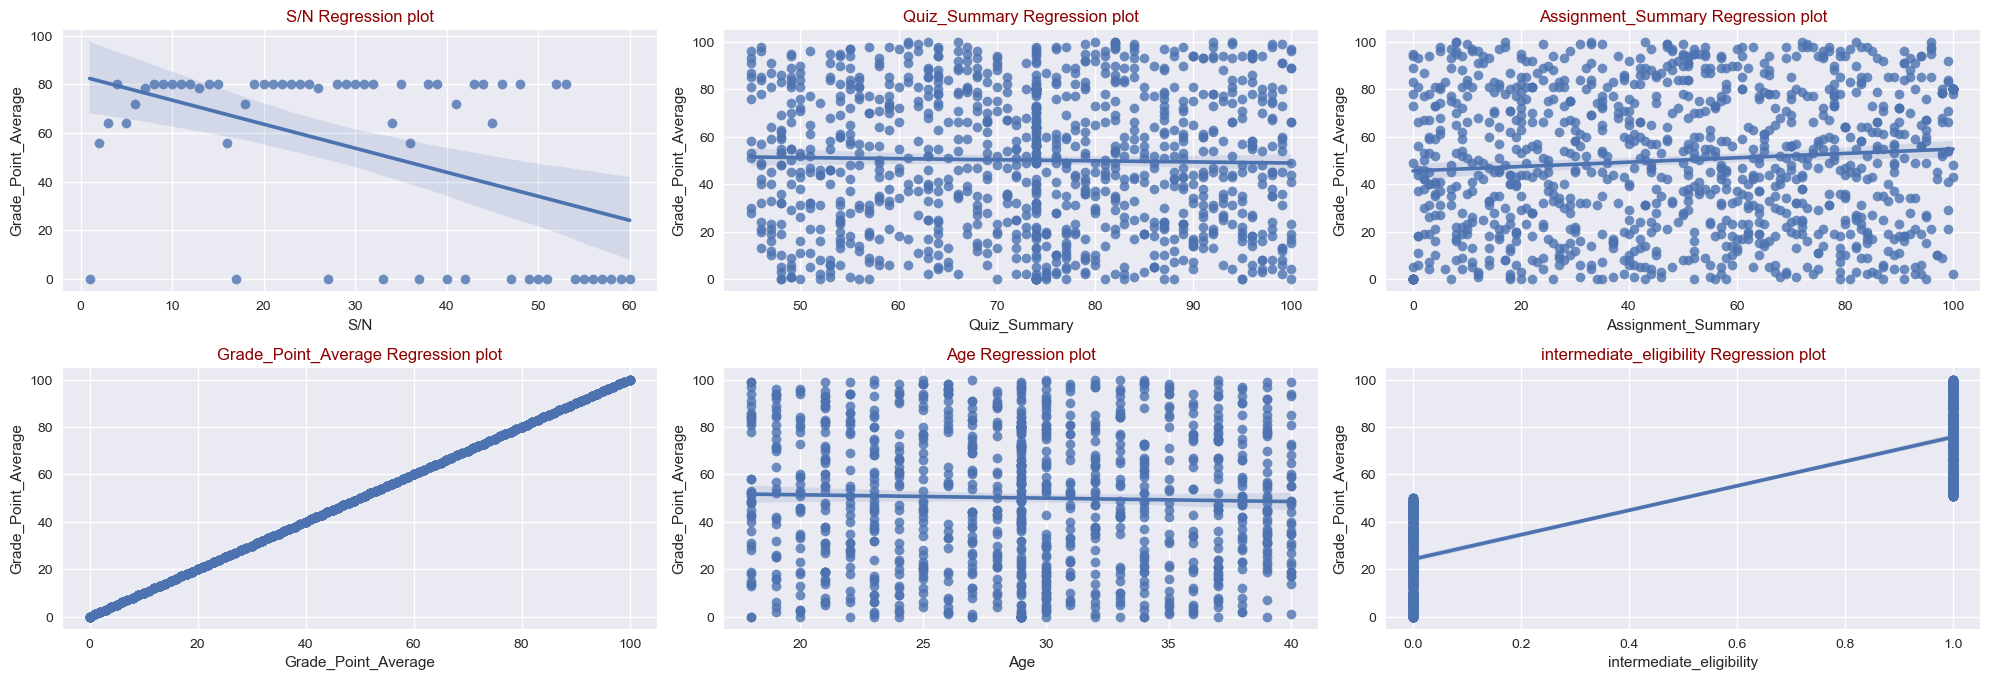

In [42]:
num_col = data.select_dtypes("number")
draw_regplot(num_col, num_col.columns, 6,3)

<AxesSubplot:xlabel='intermediate_eligibility', ylabel='Grade_Point_Average'>

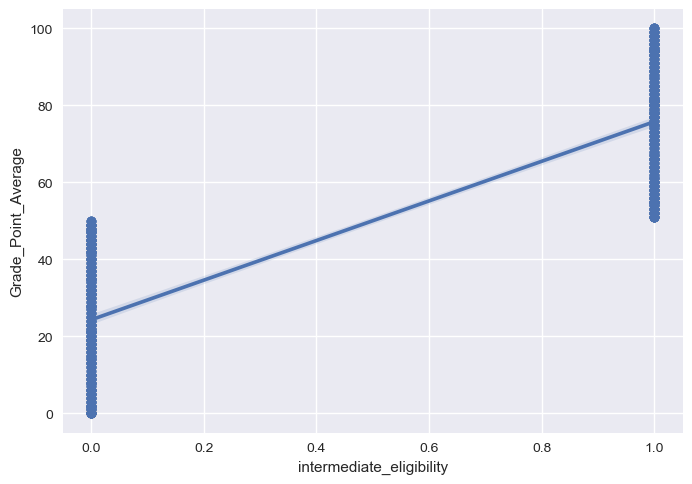

In [43]:
sns.regplot(data=data, x= "intermediate_eligibility", y="Grade_Point_Average")

In [44]:
# While other variables have a positive relationship with target variable, the age variable has a negative correlation

In [45]:
# Checking the correlation between the target variable and categorical variable
cat_col = data.select_dtypes("object").iloc[:, 1:]

In [46]:
cat_col.head()

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male


In [47]:
cat_col = pd.get_dummies(cat_col)

In [48]:
cat_col.head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [49]:
cat_col["intermediate"] = data["intermediate_eligibility"]

In [50]:
cat_col.corr()["intermediate"]

Gender_Female    0.019443
Gender_Male     -0.019443
intermediate     1.000000
Name: intermediate, dtype: float64

In [51]:
#sns.pairplot(data,hue="intermediate_eligibility",palette='bwr', kind="reg")

In [52]:
# The male gender has a positive correlation with the target varible while the female gender has a negative relationship with the target variable

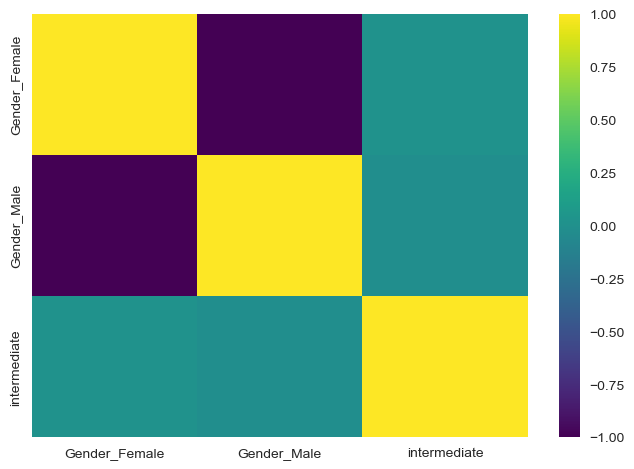

In [53]:
sns.heatmap(cat_col.corr(), cmap="viridis");

In [54]:
# Correlation heatmap between target variable and numerical variables

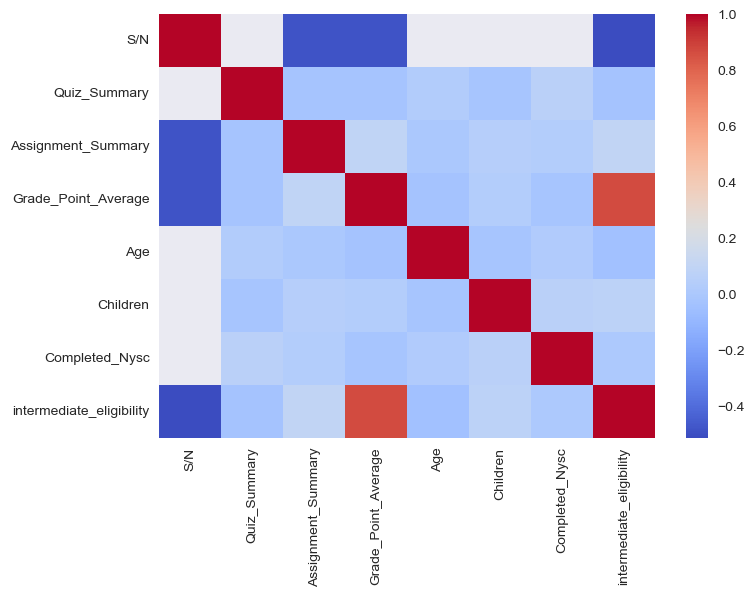

In [55]:
sns.heatmap(data.corr(), cmap="coolwarm");

### Data Transformation

In [56]:
data

,S/N,Lesson_Summary,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Gender,Age,Children,Completed_Nysc,intermediate_eligibility
0,1.0,0/5,74.0,0,0.0,Male,29.0,True,True,0
1,2.0,2023-05-05 00:00:00,74.0,70,56.0,Male,29.0,True,True,1
2,3.0,2023-02-05 00:00:00,74.0,80,64.0,Male,29.0,True,True,1
3,4.0,2023-05-05 00:00:00,74.0,100,80.0,Male,29.0,True,True,1
4,5.0,2023-06-05 00:00:00,74.0,80,64.0,Male,29.0,True,True,1
...,...,...,...,...,...,...,...,...,...,...
995,NaN,2023-02-20,49.0,1,6.0,Male,32.0,False,True,0
996,NaN,2023-02-04,92.0,99,54.0,Male,27.0,True,True,1
997,NaN,2023-04-10,84.0,37,17.0,Female,31.0,True,False,0
998,NaN,2023-01-19,47.0,19,16.0,Male,23.0,True,False,0


In [57]:
data = data.drop(columns=["S/N","Lesson_Summary"])

In [58]:
data = pd.get_dummies(data)

In [59]:
data.head()

,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Age,Children,Completed_Nysc,intermediate_eligibility,Gender_Female,Gender_Male
0,74.0,0,0.0,29.0,True,True,0,0,1
1,74.0,70,56.0,29.0,True,True,1,0,1
2,74.0,80,64.0,29.0,True,True,1,0,1
3,74.0,100,80.0,29.0,True,True,1,0,1
4,74.0,80,64.0,29.0,True,True,1,0,1


In [60]:
target = data["intermediate_eligibility"]

In [61]:
scaled_df = data.drop(columns=["intermediate_eligibility"])

In [62]:
scaled_col = scaled_df.columns

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data[scaled_col])

In [64]:
scaled = pd.DataFrame(scaled_df, columns=scaled_col)

In [65]:
scaled.head()

,Quiz_Summary,Assignment_Summary,Grade_Point_Average,Age,Children,Completed_Nysc,Gender_Female,Gender_Male
0,0.040719,-1.644687,-1.684711,-0.009654,0.94134,0.934233,-0.889123,0.889123
1,0.040719,0.688202,0.197789,-0.009654,0.94134,0.934233,-0.889123,0.889123
2,0.040719,1.021472,0.466718,-0.009654,0.94134,0.934233,-0.889123,0.889123
3,0.040719,1.688012,1.004575,-0.009654,0.94134,0.934233,-0.889123,0.889123
4,0.040719,1.021472,0.466718,-0.009654,0.94134,0.934233,-0.889123,0.889123


### Modelling

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [67]:
X_train, x_test, Y_train, y_test = train_test_split(scaled_df, target, test_size= 0.2, random_state=42)

In [68]:
# Putting models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "DecisionTree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC()
}

In [69]:
# Setting up a function to fit, predict and score model
def fit_predict_and_score(models, X_train, x_test, Y_train, y_test):
    "This fuction fit, predict and score the models using accuracy score"
    # making a dictionary to to keep model scores
    model_scores = {}
    
    # looping through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, Y_train)
        training_predict = model.predict(X_train)
        testing_predict = model.predict(x_test)
        training_accuracy = accuracy_score(training_predict, Y_train)
        testing_accuracy = accuracy_score(testing_predict, y_test)
        model_scores[name] = f" has a  score of {training_accuracy} on training set and a score of {testing_accuracy} on testing set"
    return model_scores

In [70]:
# The logistic Regression and the SVC(support Vector Classifier) perform better among the models
fit_predict_and_score(models, X_train, x_test, Y_train, y_test)

{'Logistic Regression': ' has a  score of 0.9941037735849056 on training set and a score of 0.9905660377358491 on testing set',
 'DecisionTree Classifier': ' has a  score of 1.0 on training set and a score of 1.0 on testing set',
 'Random Forest': ' has a  score of 1.0 on training set and a score of 1.0 on testing set',
 'SVC': ' has a  score of 0.9787735849056604 on training set and a score of 0.9481132075471698 on testing set'}

In [71]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
y_pred = log_reg.predict(x_test)

### Model Evaluation

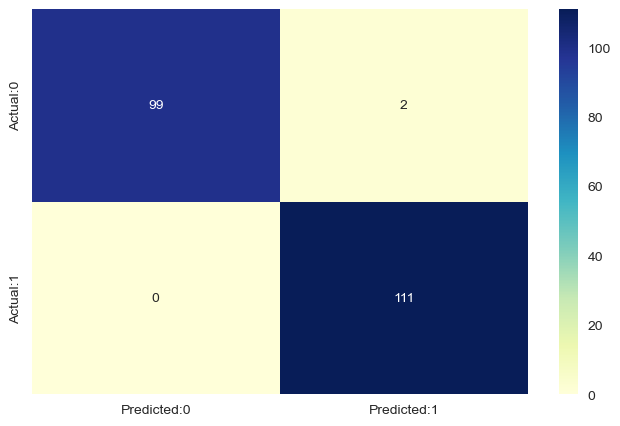

In [72]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=["Predicted:0", "Predicted:1"], index=["Actual:0", "Actual:1"])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu");

The confusion matrix shows 99+111 = 210 correct predictions and 2+0= 2 incorrect ones.

- True Positives:  111
- True Negatives:  99
- False Positives: 2 (*Type I error*)
- False Negatives: 0 ( *Type II error*)

In [73]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [74]:
print('The accuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)


The accuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9905660377358491 
 The Missclassification = 1-Accuracy =  0.009433962264150941 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  1.0 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9801980198019802 
 Positive Predictive value = TP/(TP+FP) =  0.9823008849557522 
 Negative predictive Value = TN/(TN+FN) =  1.0 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  50.49999999999996 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.0


**From the above statistics it is clear that the model is highly sensitive than specific. The positive values are predicted more accurately than the negative values.**